# Walter Piper - Springboard Capstone 2 - Exploratory Data Analysis (Part 2 of 2)
# WESAD Dataset (Wearable Affect and Stress Detection)
## The original data came with wearable device-recorded data and self-report questionnaire data.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [89]:
agg_signal_file_list = glob("D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated/agg*")
agg_signal_dict = { path.split('_')[-2] : path for path in agg_signal_file_list}
#agg_signal_dict

In [90]:
question_file_list = glob("D:/Springboard/Capstone2/WESAD/Capstone2/data/interim/*Q*")
question_dict = { path.split('\\')[-1].split('_')[-2] : path for path in question_file_list}
#question_dict

In [91]:
for Subj_ID in agg_signal_dict.keys():
    print(Subj_ID, ':\n', agg_signal_dict[Subj_ID], '\n', question_dict[Subj_ID], '\n')

S10 :
 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S10_.csv 
 D:/Springboard/Capstone2/WESAD/Capstone2/data/interim\S10_Questions.csv 

S11 :
 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S11_.csv 
 D:/Springboard/Capstone2/WESAD/Capstone2/data/interim\S11_Questions.csv 

S13 :
 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S13_.csv 
 D:/Springboard/Capstone2/WESAD/Capstone2/data/interim\S13_Questions.csv 

S14 :
 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S14_.csv 
 D:/Springboard/Capstone2/WESAD/Capstone2/data/interim\S14_Questions.csv 

S15 :
 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S15_.csv 
 D:/Springboard/Capstone2/WESAD/Capstone2/data/interim\S15_Questions.csv 

S16 :
 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S16_.csv 
 D:/Spr

S10 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S10_.csv
S11 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S11_.csv
S13 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S13_.csv
S14 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S14_.csv
S15 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S15_.csv
S16 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S16_.csv
S17 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S17_.csv
S2 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S2_.csv
S3 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_signals_S3_.csv
S4 :	 D:/Springboard/Capstone2/WESAD/Capstone2/data/processed/aggregated\aggregated_si

Condition Subject_ID signal_type       value
0       BASELINE        S10      HR_avg   99.254877
1  SOCIAL STRESS        S10      HR_avg  108.885452
2      AMUSEMENT        S10      HR_avg   76.685501
3   MEDITATION 1        S10      HR_avg   76.575485
4   MEDITATION 2        S10      HR_avg   77.959140

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 34
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condition    525 non-null    object 
 1   Subject_ID   525 non-null    object 
 2   signal_type  525 non-null    object 
 3   value        525 non-null    float64
dtypes: float64(1), object(3)
memory usage: 20.5+ KB
None


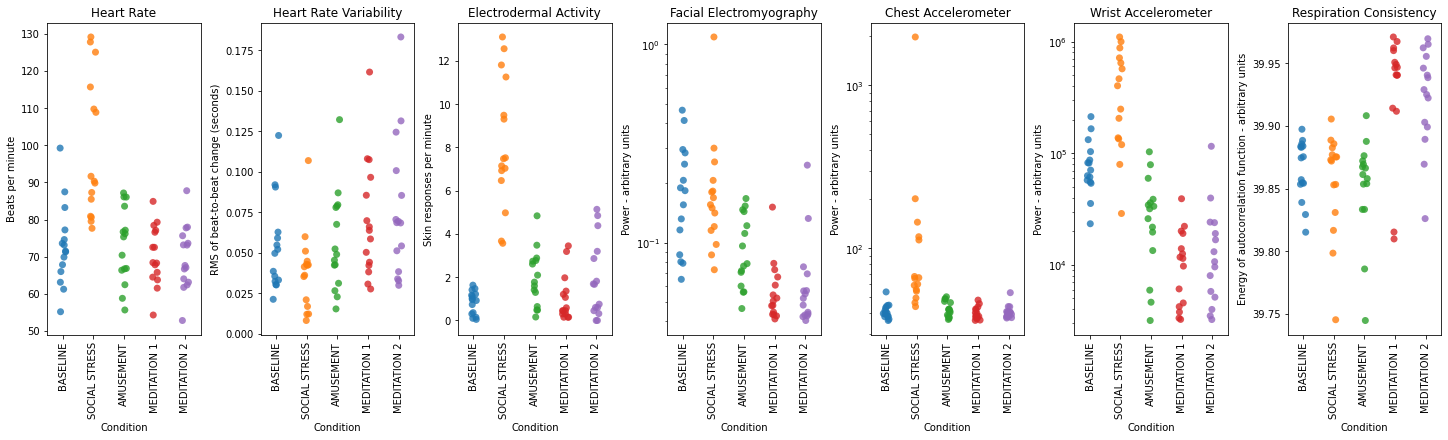

In [118]:
melted_df_list = []

for Subj_ID in agg_signal_dict.keys():
    print(Subj_ID, ':\t', agg_signal_dict[Subj_ID])
    agg_df = pd.read_csv(agg_signal_dict[Subj_ID])
    agg_df['Subject_ID'] = Subj_ID
    agg_df.columns = ['Condition', *list(agg_df.columns[1:])]
    
    #display(agg_df)

    melted_df = agg_df.melt(id_vars=list(agg_df.columns[[0, 10]]), value_vars=list(agg_df.columns[[3,4,5,6,7,8,9]]), 
                            var_name='signal_type', value_name='value')
    melted_df_list.append(melted_df.copy())
    
melted_df = pd.concat(melted_df_list)
    
display(melted_df.head())
print(melted_df.info())

title_labels = ['Heart Rate','Heart Rate Variability','Electrodermal Activity','Facial Electromyography', 'Chest Accelerometer','Wrist Accelerometer','Respiration Consistency']
yaxis_label = ['Beats per minute', 'RMS of beat-to-beat change (seconds)','Skin responses per minute',
              'Power - arbitrary units','Power - arbitrary units','Power - arbitrary units',
              'Energy of autocorrelation function - arbitrary units']
fig, ax = plt.subplots(1,7, constrained_layout=True, figsize=[20, 6])
for i, sig_type in enumerate(melted_df.signal_type.unique()):
    sns.stripplot(x='Condition', y='value', data=melted_df[melted_df.signal_type == sig_type], ax=ax[i], alpha=0.8, size=7)
    ax[i].set_title(title_labels[i])
    ax[i].set_ylabel(yaxis_label[i])
            
    ax[i].set_xticklabels(labels=melted_df.Condition.unique(), rotation=90)
    if i in [3,4,5]:
        ax[i].set_yscale('log')
#plt.figure(figsize=[14,6])
#sns.swarmplot(x='Condition', y='value', data=melted_df)
#plt.yscale('log')
    #ax[i].set_xtickslabels(rotation=90)
plt.show()

#print(Subj_ID, ':\t', question_dict[Subj_ID])


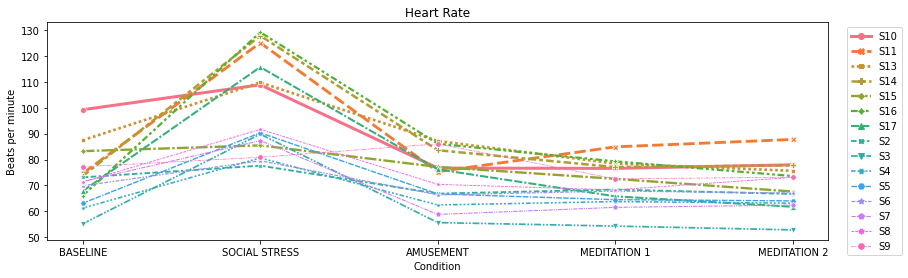

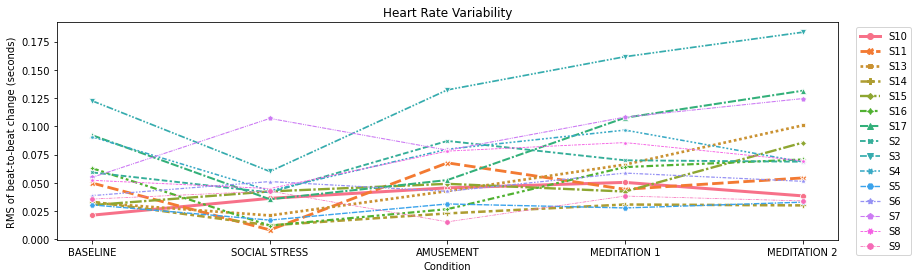

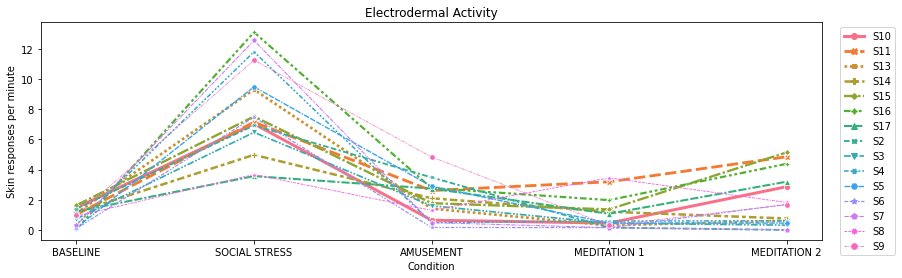

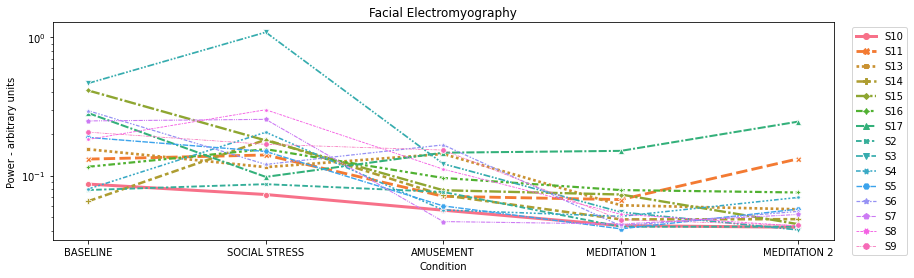

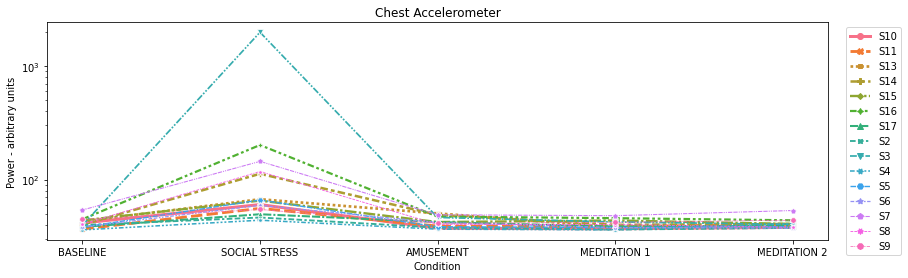

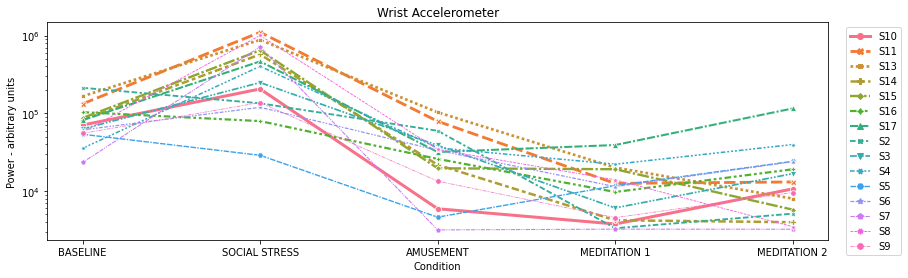

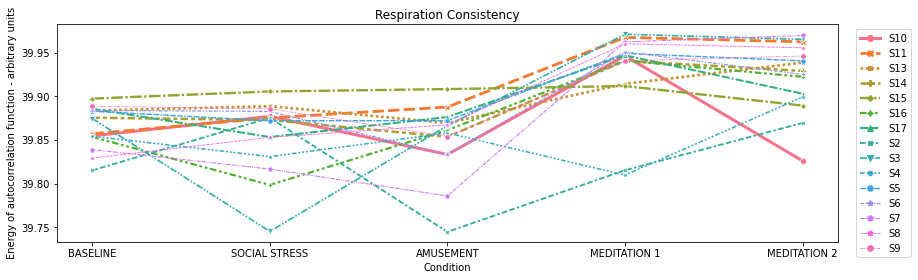

In [110]:
i = 0
sig_type = 'HR_avg'
for i, sig_type in enumerate(melted_df.signal_type.unique()):
    plt.figure(figsize=[14,4])
    sns.lineplot(x='Condition', y='value', hue='Subject_ID', data=melted_df[melted_df.signal_type == sig_type], style='Subject_ID', markers=True, size='Subject_ID')
    plt.title(title_labels[i])
    plt.ylabel(yaxis_label[i])
    plt.legend(bbox_to_anchor=[1.1, 1])
    if i in [3,4,5]:
        plt.yscale('log')
    plt.show()

In [111]:
melted_df.columns

Index(['Condition', 'Subject_ID', 'signal_type', 'value'], dtype='object')

In [114]:
unmelt_df = melted_df.pivot(index=['Condition', 'Subject_ID'], columns='signal_type', values='value').reset_index()
unmelt_df.head()

signal_type  Condition Subject_ID  ACC_chest_energy_per_minute  \
0            AMUSEMENT        S10                    37.236616   
1            AMUSEMENT        S11                    38.981536   
2            AMUSEMENT        S13                    50.417271   
3            AMUSEMENT        S14                    48.914671   
4            AMUSEMENT        S15                    42.306022   

signal_type  ACC_wrist_energy_per_minute  EMG_energy_per_minute  GSR_rate  \
0                            5921.796935               0.056127  0.645164   
1                           78895.088878               0.070751  2.608706   
2                          102973.892946               0.143299  1.413618   
3                           21753.870968               0.072021  2.096774   
4                           19623.946329               0.078252  1.774200   

signal_type  HRV_RMSSD     HR_avg  Resp_autocorr_energy  
0             0.045500  76.685501             39.833505  
1             0.067619  75.318147             39.887777  
2             0.042670  87.160320             39.869489  
3             0.022869  83.590056             39.853686  
4             0.049063  77.132518             39.908319

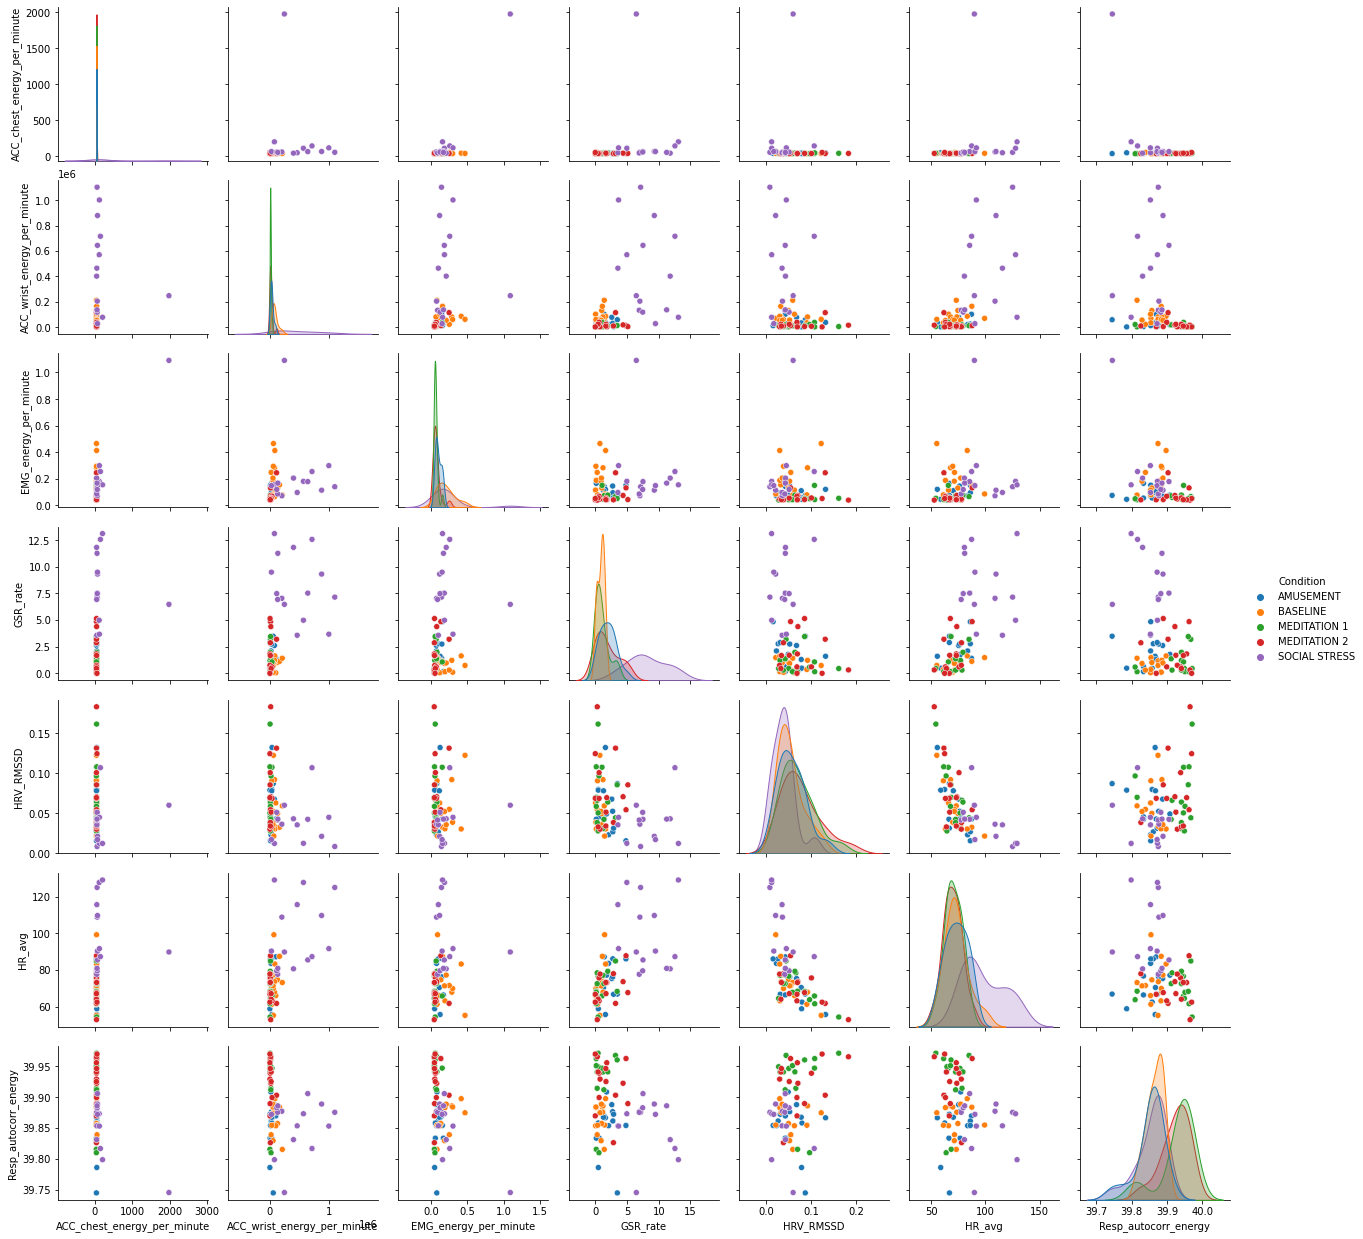

In [116]:
sns.pairplot(data=unmelt_df, hue='Condition', vars=list(unmelt_df.columns[2:]))
plt.show()

In [119]:
unmelt_df.columns

Index(['Condition', 'Subject_ID', 'ACC_chest_energy_per_minute',
       'ACC_wrist_energy_per_minute', 'EMG_energy_per_minute', 'GSR_rate',
       'HRV_RMSSD', 'HR_avg', 'Resp_autocorr_energy'],
      dtype='object', name='signal_type')

In [120]:
columns_to_log = [2,3,4]
unmelt_df.iloc[:,[2,3,4]] = np.log10(unmelt_df.iloc[:,[2,3,4]])
unmelt_df.head()

signal_type  Condition Subject_ID  ACC_chest_energy_per_minute  \
0            AMUSEMENT        S10                     1.570970   
1            AMUSEMENT        S11                     1.590859   
2            AMUSEMENT        S13                     1.702579   
3            AMUSEMENT        S14                     1.689439   
4            AMUSEMENT        S15                     1.626402   

signal_type  ACC_wrist_energy_per_minute  EMG_energy_per_minute  GSR_rate  \
0                               3.772454              -1.250828  0.645164   
1                               4.897050              -1.150267  2.608706   
2                               5.012727              -0.843758  1.413618   
3                               4.337537              -1.142540  2.096774   
4                               4.292786              -1.106505  1.774200   

signal_type  HRV_RMSSD     HR_avg  Resp_autocorr_energy  
0             0.045500  76.685501             39.833505  
1             0.067619  75.318147             39.887777  
2             0.042670  87.160320             39.869489  
3             0.022869  83.590056             39.853686  
4             0.049063  77.132518             39.908319

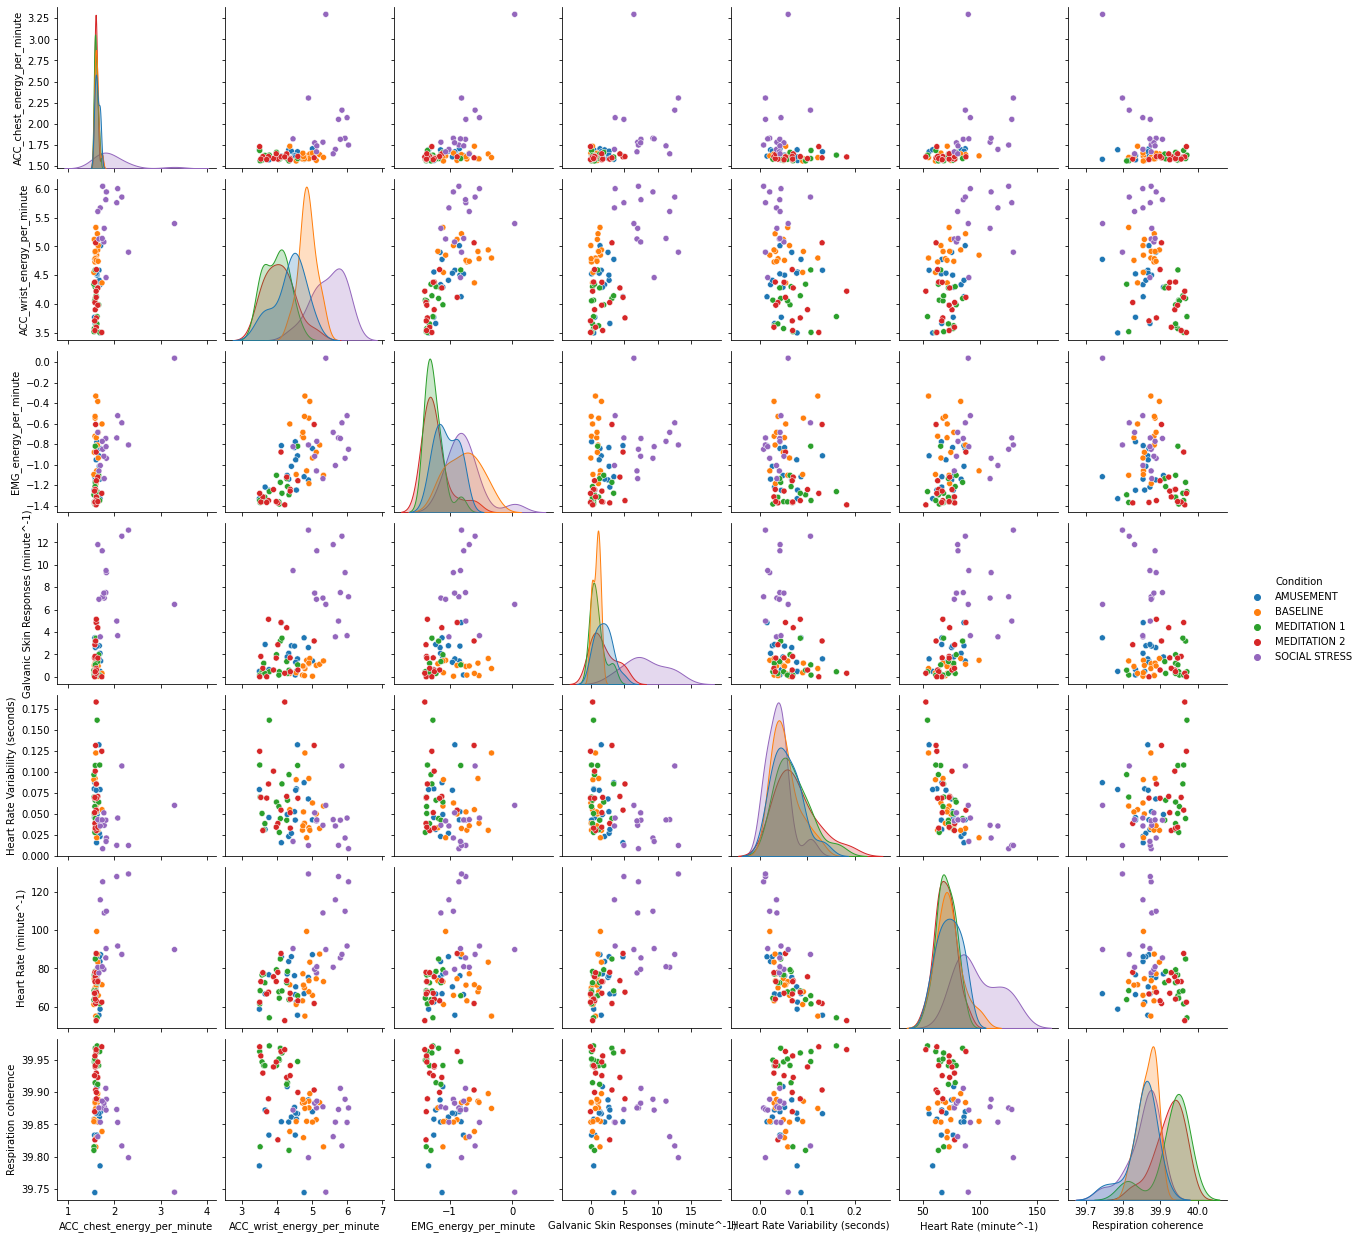

In [135]:
sns.pairplot(data=unmelt_df, hue='Condition', vars=list(unmelt_df.columns[2:]))
plt.show()

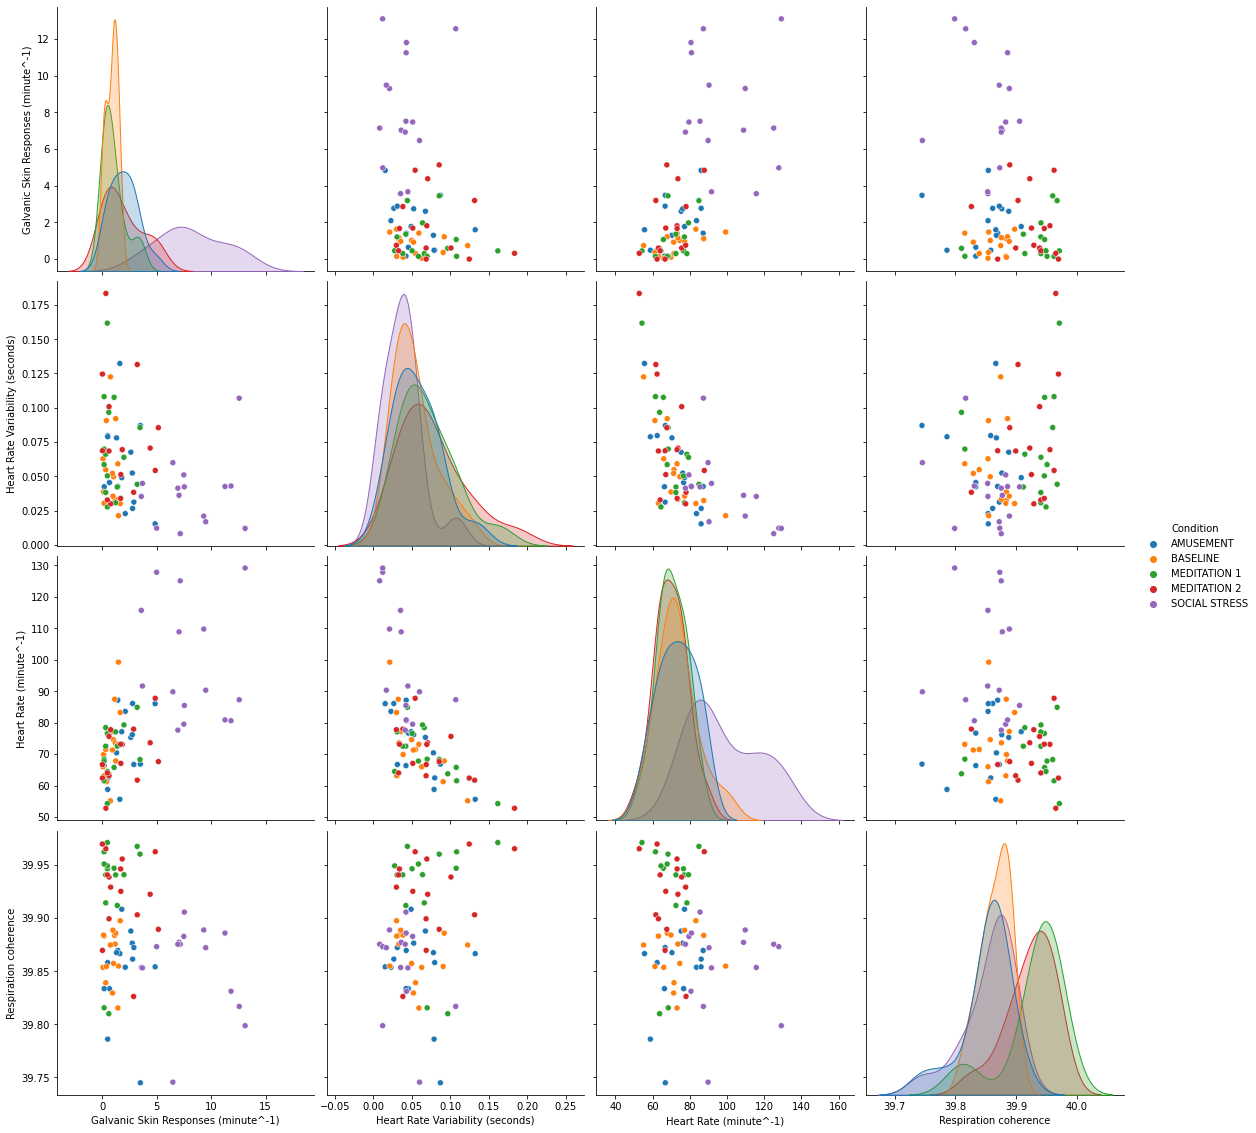

In [133]:
unmelt_df.columns = list(unmelt_df.columns[:5]) + ['Galvanic Skin Responses (minute^-1)', 'Heart Rate Variability (seconds)', 'Heart Rate (minute^-1)', 
              'Respiration coherence']
sns.pairplot(data=unmelt_df, hue='Condition', vars=list(unmelt_df.columns[5:]), height=4)


# The indicators of sympathetic nervous system activation (Heart rate, Galvanic skin responses) are heightened during social stress.
# The indicator of parasympathetic nervous system activation (Heart rate variability) is negatively correlated to these, but there is no clear difference between conditions.
# This suggests to me that social stress activates the sympathetic nervous system, and a suppressed parasympathetic system is simply along for the ride.

In [136]:
question_dict.keys()

dict_keys(['S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'])

In [168]:
Q_df_list = []
Condition_map_dict = {'Base':'BASELINE', 'TSST':'SOCIAL STRESS', 'Fun':'AMUSEMENT', 'Medi 1':'MEDITATION 1', 'Medi 2':'MEDITATION 2'}

for Subj_ID in question_dict.keys():
    #print(Subj_ID, ':\t', question_dict[Subj_ID])
    Q_df = pd.read_csv(question_dict[Subj_ID], index_col=0)
    Q_df = Q_df.iloc[2:,:]
    Q_df = Q_df.T
    Q_df['Condition'] = Q_df.index
    Q_df['Condition'] = Q_df['Condition'].map(Condition_map_dict)
    Q_df['Subject_ID'] = Subj_ID
    display(Q_df)
    
    melted_Q = Q_df.melt(id_vars=list(Q_df.columns)[-2:], value_vars=list(Q_df.columns)[:-2], var_name='signal_type', value_name='value')
    #display(melted_Q.head(11))
    
    Q_df_list.append(melted_Q)
    
Q_melted_df = pd.concat(Q_df_list)

display(Q_melted_df.head())
print(Q_melted_df.info())



Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       2.0         1.0         3.0       1.0      1.0     1.0     1.0   
Fun        2.0         1.0         3.0       4.0      1.0     2.0     1.0   
Medi 1     1.0         1.0         2.0       2.0      1.0     1.0     1.0   
TSST       4.0         4.0         3.0       1.0      3.0     1.0     1.0   
Medi 2     2.0         2.0         1.0       1.0      1.0     1.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      2.0  ...      6.0      2.0   
Fun        1.0      1.0      3.0  ...      8.0      2.0   
Medi 1     1.0      1.0      2.0  ...      6.0      1.0   
TSST       4.0      2.0      4.0  ...      3.0      8.0   
Medi 2     1.0      1.0      2.0  ...      6.0      2.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                2.0                             2.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         3.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  2.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base           S10  
Fun            S10  
Medi 1         S10  
TSST           S10  
Medi 2         S10  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         1.0         3.0       2.0      1.0     1.0     1.0   
TSST       4.0         1.0         4.0       2.0      1.0     3.0     1.0   
Medi 1     2.0         1.0         4.0       3.0      2.0     4.0     1.0   
Fun        1.0         1.0         3.0       4.0      1.0     1.0     1.0   
Medi 2     2.0         1.0         3.0       3.0      1.0     2.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      1.0  ...      6.0      2.0   
TSST       3.0      1.0      3.0  ...      4.0      6.0   
Medi 1     1.0      1.0      3.0  ...      7.0      2.0   
Fun        1.0      1.0      2.0  ...      8.0      3.0   
Medi 2     1.0      1.0      3.0  ...      6.0      2.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
TSST                                                  3.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
TSST                                5.0                             4.0   
Medi 1                              NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
TSST                         3.0   
Medi 1                       NaN   
Fun                          NaN   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
TSST                                                  4.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
TSST                                                  3.0   SOCIAL STRESS   
Medi 1                                                NaN    MEDITATION 1   
Fun                                                   NaN       AMUSEMENT   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base           S11  
TSST           S11  
Medi 1         S11  
Fun            S11  
Medi 2         S11  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         1.0         4.0       1.0      1.0     1.0     1.0   
Fun        1.0         1.0         3.0       4.0      1.0     1.0     1.0   
Medi 1     1.0         1.0         2.0       2.0      1.0     1.0     1.0   
TSST       5.0         2.0         4.0       1.0      2.0     1.0     2.0   
Medi 2     1.0         2.0         1.0       1.0      2.0     1.0     2.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      3.0  ...      5.0      3.0   
Fun        1.0      1.0      3.0  ...      8.0      4.0   
Medi 1     1.0      1.0      2.0  ...      8.0      1.0   
TSST       3.0      1.0      3.0  ...      4.0      9.0   
Medi 2     1.0      1.0      1.0  ...      2.0      6.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  4.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                5.0                             5.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         4.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  5.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base           S13  
Fun            S13  
Medi 1         S13  
TSST           S13  
Medi 2         S13  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         1.0         3.0       1.0      1.0     3.0     1.0   
TSST       4.0         1.0         3.0       1.0      1.0     3.0     1.0   
Medi 2     1.0         1.0         3.0       1.0      1.0     3.0     1.0   
Fun        1.0         1.0         3.0       2.0      1.0     3.0     1.0   
Medi 1     1.0         1.0         3.0       1.0      1.0     3.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      1.0  ...      5.0      2.0   
TSST       3.0      1.0      4.0  ...      3.0      7.0   
Medi 2     1.0      1.0      3.0  ...      4.0      3.0   
Fun        1.0      1.0      2.0  ...      7.0      2.0   
Medi 1     1.0      1.0      1.0  ...      7.0      2.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
TSST                                                  5.0   
Medi 2                                                NaN   
Fun                                                   NaN   
Medi 1                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
TSST                                5.0                             5.0   
Medi 2                              NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
TSST                         2.0   
Medi 2                       NaN   
Fun                          NaN   
Medi 1                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
TSST                                                  3.0   
Medi 2                                                NaN   
Fun                                                   NaN   
Medi 1                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
TSST                                                  3.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   

        Subject_ID  
Base           S14  
TSST           S14  
Medi 2         S14  
Fun            S14  
Medi 1         S14  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       2.0         1.0         3.0       2.0      1.0     2.0     1.0   
Fun        2.0         1.0         3.0       3.0      1.0     1.0     1.0   
Medi 1     1.0         1.0         2.0       3.0      1.0     1.0     1.0   
TSST       4.0         3.0         2.0       1.0      2.0     2.0     3.0   
Medi 2     2.0         1.0         2.0       3.0      1.0     1.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      2.0  ...      6.0      5.0   
Fun        1.0      1.0      4.0  ...      7.0      5.0   
Medi 1     1.0      1.0      2.0  ...      8.0      2.0   
TSST       2.0      2.0      5.0  ...      4.0      8.0   
Medi 2     1.0      1.0      2.0  ...      7.0      4.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  4.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                4.0                             4.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         4.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  4.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  4.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base           S15  
Fun            S15  
Medi 1         S15  
TSST           S15  
Medi 2         S15  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       2.0         1.0         3.0       2.0      1.0     2.0     1.0   
TSST       4.0         3.0         3.0       2.0      2.0     1.0     2.0   
Medi 1     2.0         1.0         2.0       2.0      1.0     2.0     1.0   
Fun        1.0         2.0         3.0       3.0      1.0     2.0     1.0   
Medi 2     1.0         1.0         2.0       2.0      1.0     1.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      3.0  ...      7.0      2.0   
TSST       3.0      1.0      3.0  ...      3.0      8.0   
Medi 1     1.0      1.0      1.0  ...      8.0      2.0   
Fun        2.0      1.0      3.0  ...      7.0      4.0   
Medi 2     2.0      1.0      1.0  ...      7.0      1.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
TSST                                                  3.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
TSST                                3.0                             4.0   
Medi 1                              NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
TSST                         4.0   
Medi 1                       NaN   
Fun                          NaN   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
TSST                                                  3.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
TSST                                                  4.0   SOCIAL STRESS   
Medi 1                                                NaN    MEDITATION 1   
Fun                                                   NaN       AMUSEMENT   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base           S16  
TSST           S16  
Medi 1         S16  
Fun            S16  
Medi 2         S16  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       2.0         1.0         4.0       1.0      1.0     1.0     1.0   
Fun        3.0         1.0         4.0       4.0      1.0     1.0     1.0   
Medi 1     1.0         1.0         3.0       1.0      1.0     1.0     1.0   
TSST       5.0         2.0         1.0       1.0      5.0     2.0     1.0   
Medi 2     4.0         1.0         2.0       1.0      1.0     1.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      2.0  ...      7.0      2.0   
Fun        1.0      1.0      3.0  ...      8.0      2.0   
Medi 1     1.0      1.0      1.0  ...      7.0      2.0   
TSST       5.0      4.0      5.0  ...      1.0      9.0   
Medi 2     1.0      1.0      3.0  ...      5.0      2.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                4.0                             1.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         4.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  5.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  5.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base           S17  
Fun            S17  
Medi 1         S17  
TSST           S17  
Medi 2         S17  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         1.0         3.0       2.0      1.0     3.0     1.0   
TSST       3.0         2.0         4.0       1.0      3.0     3.0     1.0   
Medi 1     1.0         1.0         2.0       3.0      1.0     2.0     1.0   
Fun        1.0         1.0         2.0       3.0      1.0     1.0     1.0   
Medi 2     1.0         1.0         1.0       2.0      1.0     1.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      2.0  ...      7.0      2.0   
TSST       2.0      1.0      4.0  ...      5.0      4.0   
Medi 1     1.0      1.0      1.0  ...      7.0      2.0   
Fun        1.0      1.0      1.0  ...      8.0      1.0   
Medi 2     1.0      1.0      1.0  ...      7.0      2.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
TSST                                                  5.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
TSST                                5.0                             4.0   
Medi 1                              NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
TSST                         4.0   
Medi 1                       NaN   
Fun                          NaN   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
TSST                                                  3.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
TSST                                                  5.0   SOCIAL STRESS   
Medi 1                                                NaN    MEDITATION 1   
Fun                                                   NaN       AMUSEMENT   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S2  
TSST            S2  
Medi 1          S2  
Fun             S2  
Medi 2          S2  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       3.0         1.0         5.0       3.0      1.0     4.0     3.0   
TSST       4.0         4.0         5.0       3.0      1.0     3.0     1.0   
Medi 1     1.0         3.0         2.0       2.0      1.0     1.0     1.0   
Fun        4.0         1.0         5.0       5.0      1.0     3.0     2.0   
Medi 2     3.0         1.0         2.0       1.0      1.0     2.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      4.0  ...      7.0      4.0   
TSST       4.0      1.0      5.0  ...      7.0      7.0   
Medi 1     1.0      1.0      1.0  ...      6.0      3.0   
Fun        1.0      1.0      4.0  ...      8.0      4.0   
Medi 2     1.0      1.0      1.0  ...      6.0      3.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
TSST                                                  4.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
TSST                                5.0                             4.0   
Medi 1                              NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
TSST                         4.0   
Medi 1                       NaN   
Fun                          NaN   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
TSST                                                  5.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
TSST                                                  5.0   SOCIAL STRESS   
Medi 1                                                NaN    MEDITATION 1   
Fun                                                   NaN       AMUSEMENT   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S3  
TSST            S3  
Medi 1          S3  
Fun             S3  
Medi 2          S3  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         2.0         3.0       2.0      2.0     1.0     1.0   
Fun        1.0         1.0         4.0       4.0      1.0     1.0     1.0   
Medi 1     1.0         1.0         1.0       1.0      2.0     1.0     1.0   
TSST       4.0         2.0         2.0       1.0      1.0     1.0     1.0   
Medi 2     1.0         2.0         1.0       2.0      2.0     1.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      1.0  ...      7.0      2.0   
Fun        1.0      1.0      3.0  ...      8.0      1.0   
Medi 1     1.0      3.0      2.0  ...      5.0      7.0   
TSST       1.0      1.0      2.0  ...      5.0      7.0   
Medi 2     1.0      1.0      2.0  ...      5.0      2.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                4.0                             3.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         4.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  5.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  4.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S4  
Fun             S4  
Medi 1          S4  
TSST            S4  
Medi 2          S4  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         1.0         4.0       3.0      1.0     3.0     1.0   
Fun        1.0         1.0         3.0       3.0      1.0     2.0     1.0   
Medi 1     1.0         1.0         3.0       1.0      1.0     3.0     1.0   
TSST       5.0         1.0         4.0       2.0      2.0     3.0     1.0   
Medi 2     1.0         1.0         3.0       2.0      1.0     2.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      4.0  ...      7.0      2.0   
Fun        1.0      1.0      3.0  ...      6.0      2.0   
Medi 1     1.0      1.0      1.0  ...      6.0      1.0   
TSST       2.0      1.0      5.0  ...      5.0      8.0   
Medi 2     1.0      1.0      2.0  ...      7.0      1.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  5.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                5.0                             5.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         5.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  2.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S5  
Fun             S5  
Medi 1          S5  
TSST            S5  
Medi 2          S5  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       2.0         1.0         5.0       4.0      1.0     4.0     1.0   
TSST       5.0         1.0         4.0       4.0      1.0     4.0     1.0   
Medi 1     1.0         1.0         2.0       2.0      1.0     3.0     1.0   
Fun        2.0         1.0         4.0       4.0      1.0     3.0     1.0   
Medi 2     2.0         1.0         3.0       4.0      1.0     4.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       2.0      1.0      4.0  ...      8.0      2.0   
TSST       2.0      1.0      4.0  ...      6.0      3.0   
Medi 1     1.0      1.0      3.0  ...      6.0      2.0   
Fun        3.0      1.0      3.0  ...      8.0      2.0   
Medi 2     1.0      1.0      4.0  ...      8.0      1.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
TSST                                                  4.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
TSST                                4.0                             4.0   
Medi 1                              NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
TSST                         2.0   
Medi 1                       NaN   
Fun                          NaN   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
TSST                                                  2.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
TSST                                                  2.0   SOCIAL STRESS   
Medi 1                                                NaN    MEDITATION 1   
Fun                                                   NaN       AMUSEMENT   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S6  
TSST            S6  
Medi 1          S6  
Fun             S6  
Medi 2          S6  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         1.0         4.0       3.0      1.0     2.0     1.0   
Fun        2.0         1.0         4.0       5.0      1.0     2.0     1.0   
Medi 1     1.0         1.0         2.0       1.0      1.0     2.0     1.0   
TSST       3.0         2.0         3.0       2.0      2.0     3.0     1.0   
Medi 2     1.0         2.0         2.0       3.0      1.0     2.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      1.0  ...      7.0      2.0   
Fun        1.0      1.0      2.0  ...      7.0      7.0   
Medi 1     1.0      1.0      1.0  ...      7.0      2.0   
TSST       1.0      1.0      3.0  ...      6.0      7.0   
Medi 2     1.0      1.0      1.0  ...      7.0      3.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                4.0                             4.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         4.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  3.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  3.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S7  
Fun             S7  
Medi 1          S7  
TSST            S7  
Medi 2          S7  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       1.0         2.0         3.0       3.0      1.0     3.0     1.0   
Fun        1.0         1.0         2.0       3.0      1.0     1.0     1.0   
Medi 1     2.0         2.0         2.0       1.0      1.0     1.0     1.0   
TSST       2.0         2.0         3.0       3.0      1.0     2.0     1.0   
Medi 2     1.0         1.0         1.0       1.0      1.0     1.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       1.0      1.0      3.0  ...      7.0      3.0   
Fun        1.0      1.0      2.0  ...      7.0      3.0   
Medi 1     1.0      1.0      2.0  ...      7.0      2.0   
TSST       2.0      1.0      3.0  ...      5.0      7.0   
Medi 2     1.0      1.0      2.0  ...      6.0      4.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  4.0   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 1                              NaN                             NaN   
TSST                                5.0                             4.0   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
Fun                          NaN   
Medi 1                       NaN   
TSST                         3.0   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
Fun                                                   NaN   
Medi 1                                                NaN   
TSST                                                  4.0   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
Fun                                                   NaN       AMUSEMENT   
Medi 1                                                NaN    MEDITATION 1   
TSST                                                  4.0   SOCIAL STRESS   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S8  
Fun             S8  
Medi 1          S8  
TSST            S8  
Medi 2          S8  

[5 rows x 42 columns]

Active  Distressed  Interested  Inspired  Annoyed  Strong  Guilty  \
Base       2.0         1.0         3.0       2.0      1.0     3.0     1.0   
TSST       4.0         2.0         5.0       4.0      1.0     2.0     1.0   
Medi 1     1.0         1.0         2.0       2.0      1.0     2.0     1.0   
Fun        2.0         1.0         2.0       3.0      1.0     2.0     1.0   
Medi 2     1.0         1.0         2.0       1.0      1.0     2.0     1.0   

        Scared  Hostile  Excited  ...  Valence  Arousal  \
Base       2.0      1.0      2.0  ...      8.0      3.0   
TSST       2.0      1.0      3.0  ...      7.0      4.0   
Medi 1     1.0      1.0      2.0  ...      9.0      1.0   
Fun        1.0      2.0      2.0  ...      7.0      3.0   
Medi 2     1.0      1.0      1.0  ...      9.0      1.0   

        I was committed to attaining my performance goals  \
Base                                                  NaN   
TSST                                                  3.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I wanted to succeed on the task  I was motivated to do the task  \
Base                                NaN                             NaN   
TSST                                3.0                             4.0   
Medi 1                              NaN                             NaN   
Fun                                 NaN                             NaN   
Medi 2                              NaN                             NaN   

        I reflected about myself  \
Base                         NaN   
TSST                         5.0   
Medi 1                       NaN   
Fun                          NaN   
Medi 2                       NaN   

        I was worried about what other people think of me  \
Base                                                  NaN   
TSST                                                  2.0   
Medi 1                                                NaN   
Fun                                                   NaN   
Medi 2                                                NaN   

        I felt concerned about the impression I was making      Condition  \
Base                                                  NaN        BASELINE   
TSST                                                  1.0   SOCIAL STRESS   
Medi 1                                                NaN    MEDITATION 1   
Fun                                                   NaN       AMUSEMENT   
Medi 2                                                NaN    MEDITATION 2   

        Subject_ID  
Base            S9  
TSST            S9  
Medi 1          S9  
Fun             S9  
Medi 2          S9  

[5 rows x 42 columns]

Condition Subject_ID signal_type  value
0       BASELINE        S10      Active    2.0
1      AMUSEMENT        S10      Active    2.0
2   MEDITATION 1        S10      Active    1.0
3  SOCIAL STRESS        S10      Active    4.0
4   MEDITATION 2        S10      Active    2.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condition    3000 non-null   object 
 1   Subject_ID   3000 non-null   object 
 2   signal_type  3000 non-null   object 
 3   value        2519 non-null   float64
dtypes: float64(1), object(3)
memory usage: 117.2+ KB
None


In [169]:
Q_melted_df[Q_melted_df.signal_type == 'I reflected about myself']

Condition Subject_ID               signal_type  value
185       BASELINE        S10  I reflected about myself    NaN
186      AMUSEMENT        S10  I reflected about myself    NaN
187   MEDITATION 1        S10  I reflected about myself    NaN
188  SOCIAL STRESS        S10  I reflected about myself    3.0
189   MEDITATION 2        S10  I reflected about myself    NaN
..             ...        ...                       ...    ...
185       BASELINE         S9  I reflected about myself    NaN
186  SOCIAL STRESS         S9  I reflected about myself    5.0
187   MEDITATION 1         S9  I reflected about myself    NaN
188      AMUSEMENT         S9  I reflected about myself    NaN
189   MEDITATION 2         S9  I reflected about myself    NaN

[75 rows x 4 columns]

In [154]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 34
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condition    525 non-null    object 
 1   Subject_ID   525 non-null    object 
 2   signal_type  525 non-null    object 
 3   value        525 non-null    float64
dtypes: float64(1), object(3)
memory usage: 20.5+ KB


In [156]:
len(Q_melted_df.signal_type.unique())

40

In [158]:
Q_melted_df.signal_type.unique()

array(['Active', 'Distressed', 'Interested', 'Inspired', 'Annoyed',
       'Strong', 'Guilty', 'Scared', 'Hostile', 'Excited', 'Proud',
       'Irritable', 'Enthusiastic', 'Ashamed', 'Alert', 'Nervous',
       'Determined', 'Attentive', 'Jittery', 'Afraid', 'Stressed',
       'Frustrated', 'Happy', 'Angry', 'Irritated', 'Sad',
       'I feel at ease', 'I feel nervous', 'I am jittery', 'I am relaxed',
       'I am worried', 'I feel pleasant', 'Valence', 'Arousal',
       'I was committed to attaining my performance goals',
       'I wanted to succeed on the task',
       'I was motivated to do the task', 'I reflected about myself',
       'I was worried about what other people think of me',
       'I felt concerned about the impression I was making'], dtype=object)

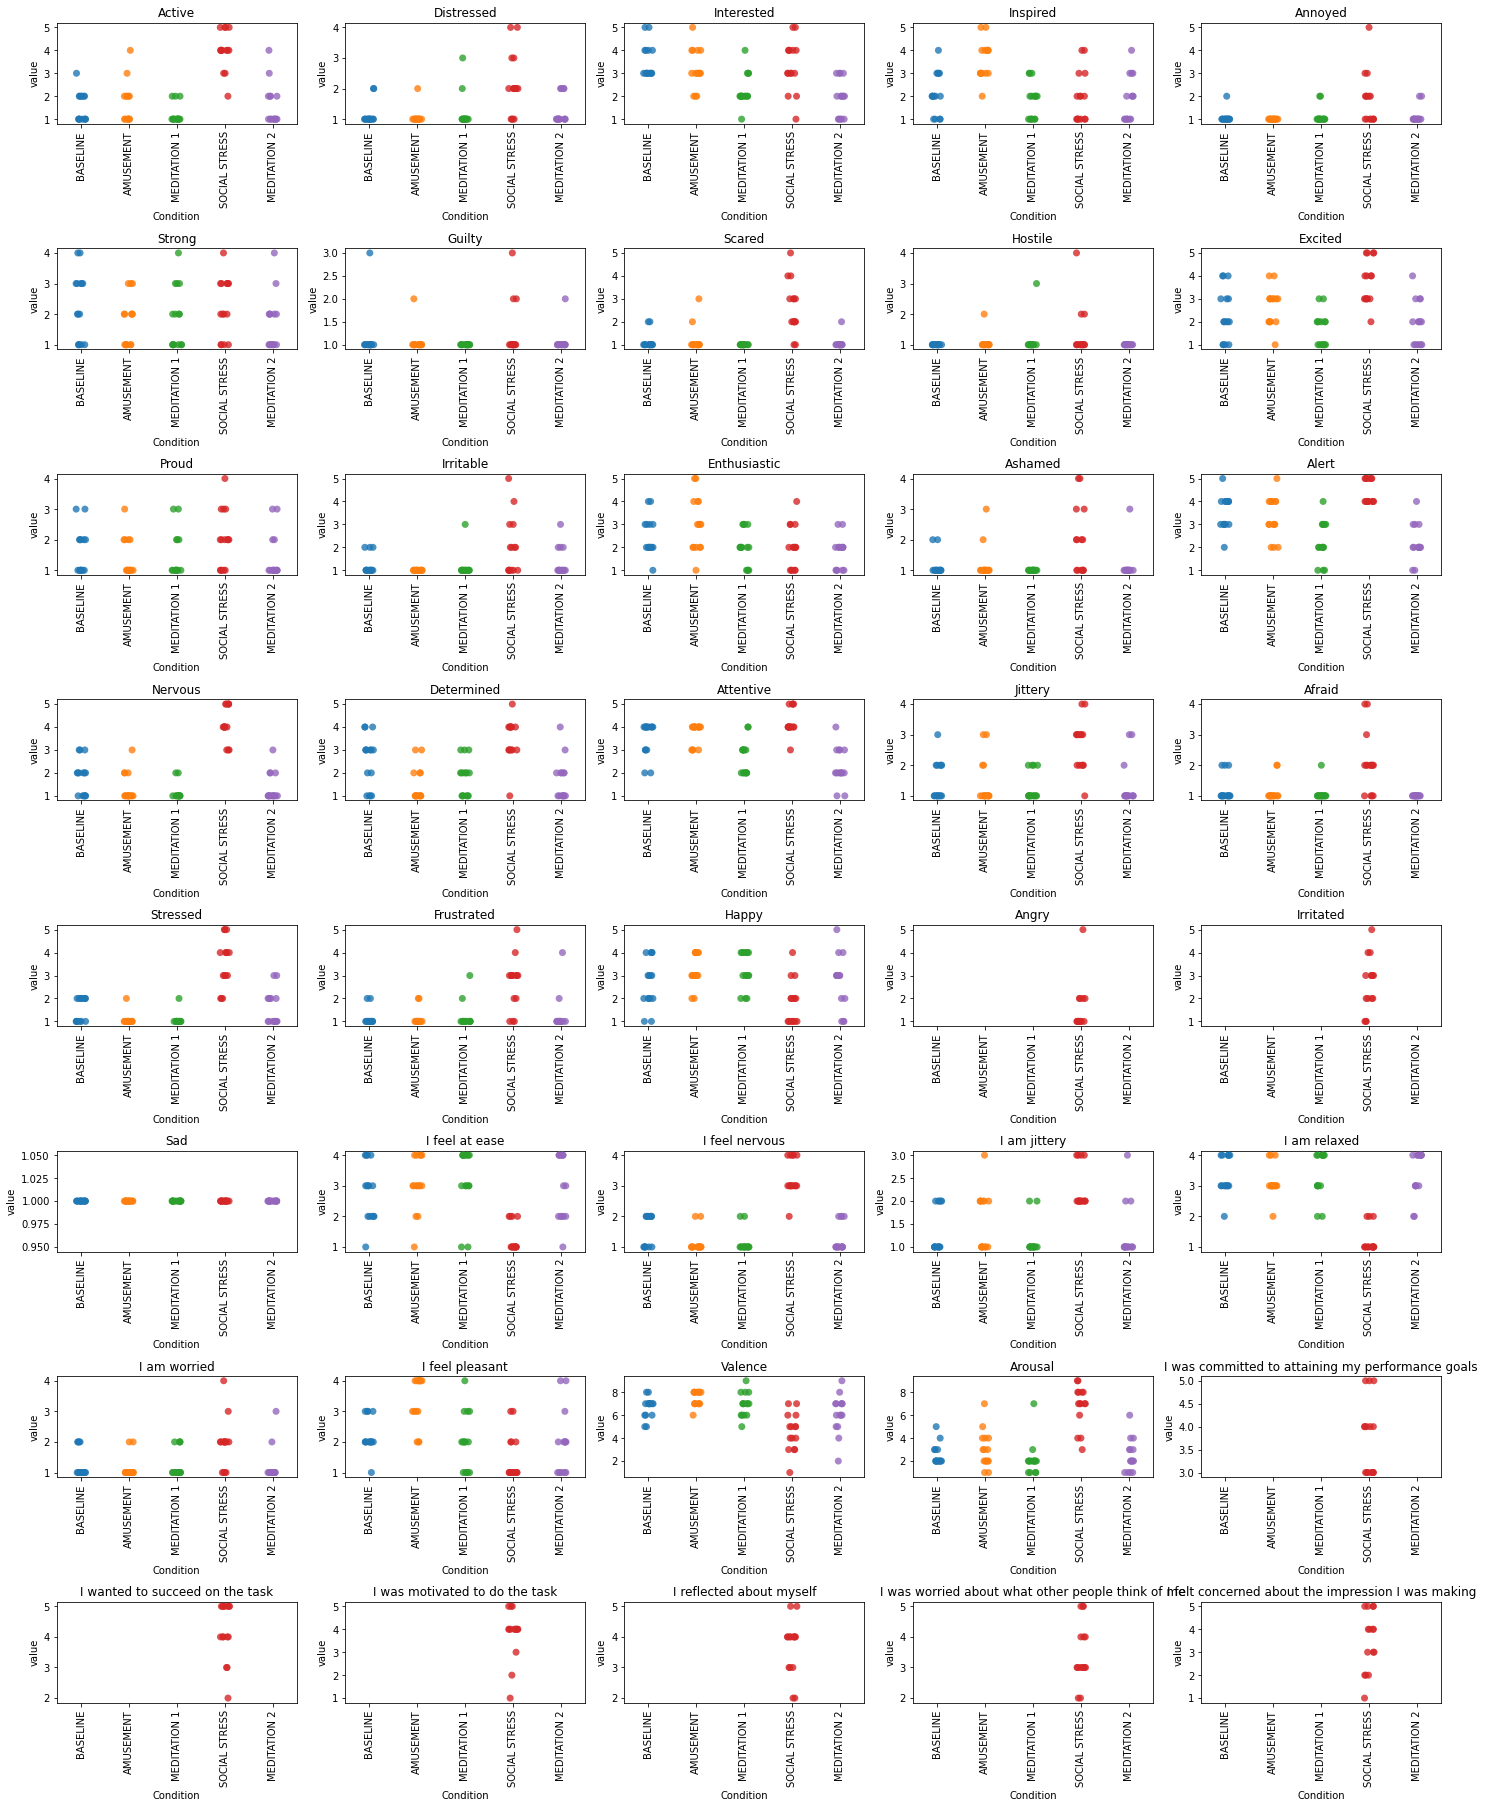

In [173]:
Q_list = Q_melted_df.signal_type.unique()
index_val = np.arange(40).reshape([8,5])
fig, ax = plt.subplots(8,5, constrained_layout=True, figsize=[20, 25])
for i in range(8):
    for k in range(5):
        sig_type = Q_list[index_val[i,k]]
        sns.stripplot(ax=ax[i][k], data=Q_melted_df[Q_melted_df.signal_type == sig_type], x='Condition', y='value', alpha=0.8, size=7)
        ax[i][k].set_xticklabels(labels=Q_melted_df.Condition.unique(), rotation=90)
        ax[i][k].set_title(sig_type)
plt.show()

In [174]:
Q_unmelt_df = Q_melted_df.pivot(index=['Condition', 'Subject_ID'], columns='signal_type', values='value').reset_index()
Q_unmelt_df.head()

signal_type  Condition Subject_ID  Active  Afraid  Alert  Angry  Annoyed  \
0            AMUSEMENT        S10     2.0     1.0    2.0    NaN      1.0   
1            AMUSEMENT        S11     1.0     1.0    2.0    NaN      1.0   
2            AMUSEMENT        S13     1.0     1.0    4.0    NaN      1.0   
3            AMUSEMENT        S14     1.0     1.0    3.0    NaN      1.0   
4            AMUSEMENT        S15     2.0     2.0    4.0    NaN      1.0   

signal_type  Arousal  Ashamed  Attentive  ...  Irritable  Irritated  Jittery  \
0                2.0      1.0        4.0  ...        1.0        NaN      1.0   
1                3.0      1.0        4.0  ...        1.0        NaN      1.0   
2                4.0      1.0        4.0  ...        1.0        NaN      1.0   
3                2.0      1.0        4.0  ...        1.0        NaN      1.0   
4                5.0      1.0        4.0  ...        1.0        NaN      1.0   

signal_type  Nervous  Proud  Sad  Scared  Stressed  Strong  Valence  
0                1.0    1.0  1.0     1.0       1.0     2.0      8.0  
1                1.0    1.0  1.0     1.0       1.0     1.0      8.0  
2                1.0    1.0  1.0     1.0       1.0     1.0      8.0  
3                1.0    3.0  1.0     1.0       1.0     3.0      7.0  
4                3.0    2.0  1.0     1.0       1.0     1.0      7.0  

[5 rows x 42 columns]

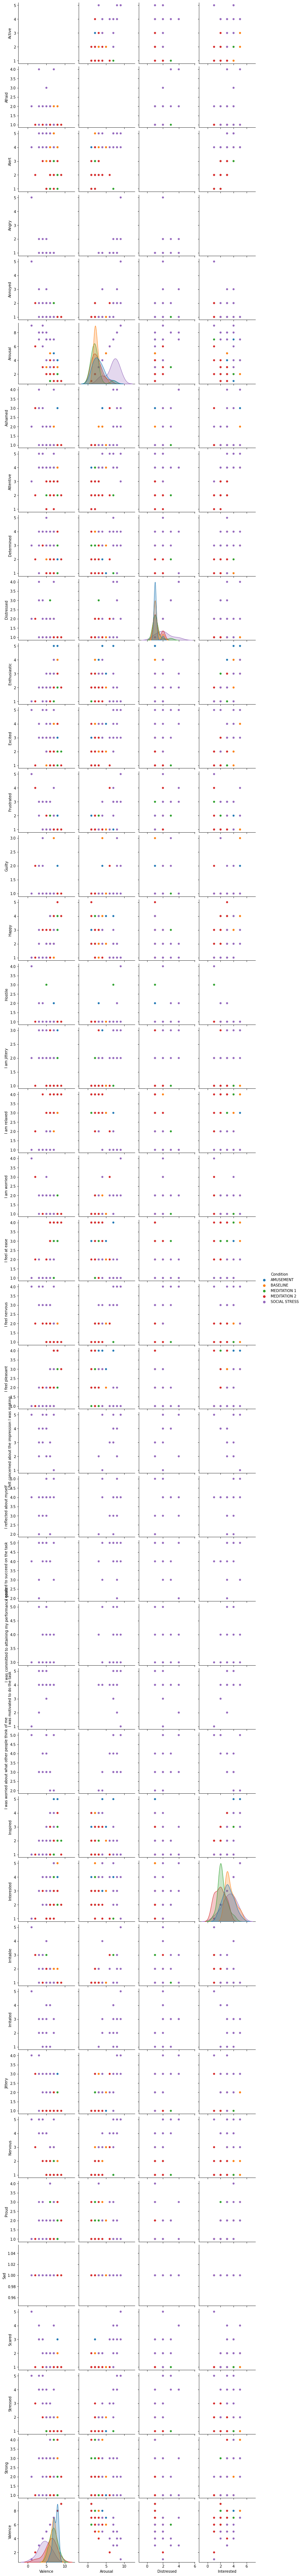

In [176]:
sns.pairplot(data=Q_unmelt_df, hue='Condition', x_vars=['Valence','Arousal','Distressed','Interested'], y_vars=list(Q_unmelt_df.columns)[2:])

# There is nothing interesting in this plot. Only associations like positive valence with feeling pleasant, for example.
# A much more interesting pair plot will be physio measures to questionnaire items.

In [177]:
BOTH_melted = pd.concat([melted_df, Q_melted_df])
print(BOTH_melted.info())
display(BOTH_melted.head())
display(BOTH_melted.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condition    3525 non-null   object 
 1   Subject_ID   3525 non-null   object 
 2   signal_type  3525 non-null   object 
 3   value        3044 non-null   float64
dtypes: float64(1), object(3)
memory usage: 137.7+ KB
None


Condition Subject_ID signal_type       value
0       BASELINE        S10      HR_avg   99.254877
1  SOCIAL STRESS        S10      HR_avg  108.885452
2      AMUSEMENT        S10      HR_avg   76.685501
3   MEDITATION 1        S10      HR_avg   76.575485
4   MEDITATION 2        S10      HR_avg   77.959140

Condition Subject_ID  \
195       BASELINE         S9   
196  SOCIAL STRESS         S9   
197   MEDITATION 1         S9   
198      AMUSEMENT         S9   
199   MEDITATION 2         S9   

                                           signal_type  value  
195  I felt concerned about the impression I was ma...    NaN  
196  I felt concerned about the impression I was ma...    1.0  
197  I felt concerned about the impression I was ma...    NaN  
198  I felt concerned about the impression I was ma...    NaN  
199  I felt concerned about the impression I was ma...    NaN

In [178]:
BOTH_unmelt_df = BOTH_melted.pivot(index=['Condition', 'Subject_ID'], columns='signal_type', values='value').reset_index()
BOTH_unmelt_df.head()

signal_type  Condition Subject_ID  ACC_chest_energy_per_minute  \
0            AMUSEMENT        S10                    37.236616   
1            AMUSEMENT        S11                    38.981536   
2            AMUSEMENT        S13                    50.417271   
3            AMUSEMENT        S14                    48.914671   
4            AMUSEMENT        S15                    42.306022   

signal_type  ACC_wrist_energy_per_minute  Active  Afraid  Alert  Angry  \
0                            5921.796935     2.0     1.0    2.0    NaN   
1                           78895.088878     1.0     1.0    2.0    NaN   
2                          102973.892946     1.0     1.0    4.0    NaN   
3                           21753.870968     1.0     1.0    3.0    NaN   
4                           19623.946329     2.0     2.0    4.0    NaN   

signal_type  Annoyed  Arousal  ...  Irritated  Jittery  Nervous  Proud  \
0                1.0      2.0  ...        NaN      1.0      1.0    1.0   
1                1.0      3.0  ...        NaN      1.0      1.0    1.0   
2                1.0      4.0  ...        NaN      1.0      1.0    1.0   
3                1.0      2.0  ...        NaN      1.0      1.0    3.0   
4                1.0      5.0  ...        NaN      1.0      3.0    2.0   

signal_type  Resp_autocorr_energy  Sad  Scared  Stressed  Strong  Valence  
0                       39.833505  1.0     1.0       1.0     2.0      8.0  
1                       39.887777  1.0     1.0       1.0     1.0      8.0  
2                       39.869489  1.0     1.0       1.0     1.0      8.0  
3                       39.853686  1.0     1.0       1.0     3.0      7.0  
4                       39.908319  1.0     1.0       1.0     1.0      7.0  

[5 rows x 49 columns]

In [180]:
temp_list = list(BOTH_unmelt_df.columns)
for i, item in enumerate(temp_list):
    print(i, ":", item)

0 : Condition
1 : Subject_ID
2 : ACC_chest_energy_per_minute
3 : ACC_wrist_energy_per_minute
4 : Active
5 : Afraid
6 : Alert
7 : Angry
8 : Annoyed
9 : Arousal
10 : Ashamed
11 : Attentive
12 : Determined
13 : Distressed
14 : EMG_energy_per_minute
15 : Enthusiastic
16 : Excited
17 : Frustrated
18 : GSR_rate
19 : Guilty
20 : HRV_RMSSD
21 : HR_avg
22 : Happy
23 : Hostile
24 : I am jittery
25 : I am relaxed
26 : I am worried
27 : I feel at ease
28 : I feel nervous
29 : I feel pleasant
30 : I felt concerned about the impression I was making
31 : I reflected about myself
32 : I wanted to succeed on the task
33 : I was committed to attaining my performance goals
34 : I was motivated to do the task
35 : I was worried about what other people think of me
36 : Inspired
37 : Interested
38 : Irritable
39 : Irritated
40 : Jittery
41 : Nervous
42 : Proud
43 : Resp_autocorr_energy
44 : Sad
45 : Scared
46 : Stressed
47 : Strong
48 : Valence


In [188]:
column_numbers_physio = [2, 3, 14, 18, 20, 21, 43]
list_not_physio = list( set(np.arange(49)) - set(column_numbers_physio) )

y_col_nums = column_numbers_physio.copy()
y_col_nums.extend(list_not_physio)  # in place

In [189]:
print(column_numbers_physio)
print(y_col_nums)

[2, 3, 14, 18, 20, 21, 43]
[2, 3, 14, 18, 20, 21, 43, 0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48]


In [193]:
x_col_names = list(BOTH_unmelt_df.columns[column_numbers_physio])
y_col_names = list(BOTH_unmelt_df.columns[y_col_nums])
print(x_col_names)
print(y_col_names)

['ACC_chest_energy_per_minute', 'ACC_wrist_energy_per_minute', 'EMG_energy_per_minute', 'GSR_rate', 'HRV_RMSSD', 'HR_avg', 'Resp_autocorr_energy']
['ACC_chest_energy_per_minute', 'ACC_wrist_energy_per_minute', 'EMG_energy_per_minute', 'GSR_rate', 'HRV_RMSSD', 'HR_avg', 'Resp_autocorr_energy', 'Condition', 'Subject_ID', 'Active', 'Afraid', 'Alert', 'Angry', 'Annoyed', 'Arousal', 'Ashamed', 'Attentive', 'Determined', 'Distressed', 'Enthusiastic', 'Excited', 'Frustrated', 'Guilty', 'Happy', 'Hostile', 'I am jittery', 'I am relaxed', 'I am worried', 'I feel at ease', 'I feel nervous', 'I feel pleasant', 'I felt concerned about the impression I was making', 'I reflected about myself', 'I wanted to succeed on the task', 'I was committed to attaining my performance goals', 'I was motivated to do the task', 'I was worried about what other people think of me', 'Inspired', 'Interested', 'Irritable', 'Irritated', 'Jittery', 'Nervous', 'Proud', 'Sad', 'Scared', 'Stressed', 'Strong', 'Valence']


In [196]:
BOTH_unmelt_df[x_col_names[:3]] = np.log10(BOTH_unmelt_df[x_col_names[:3]])

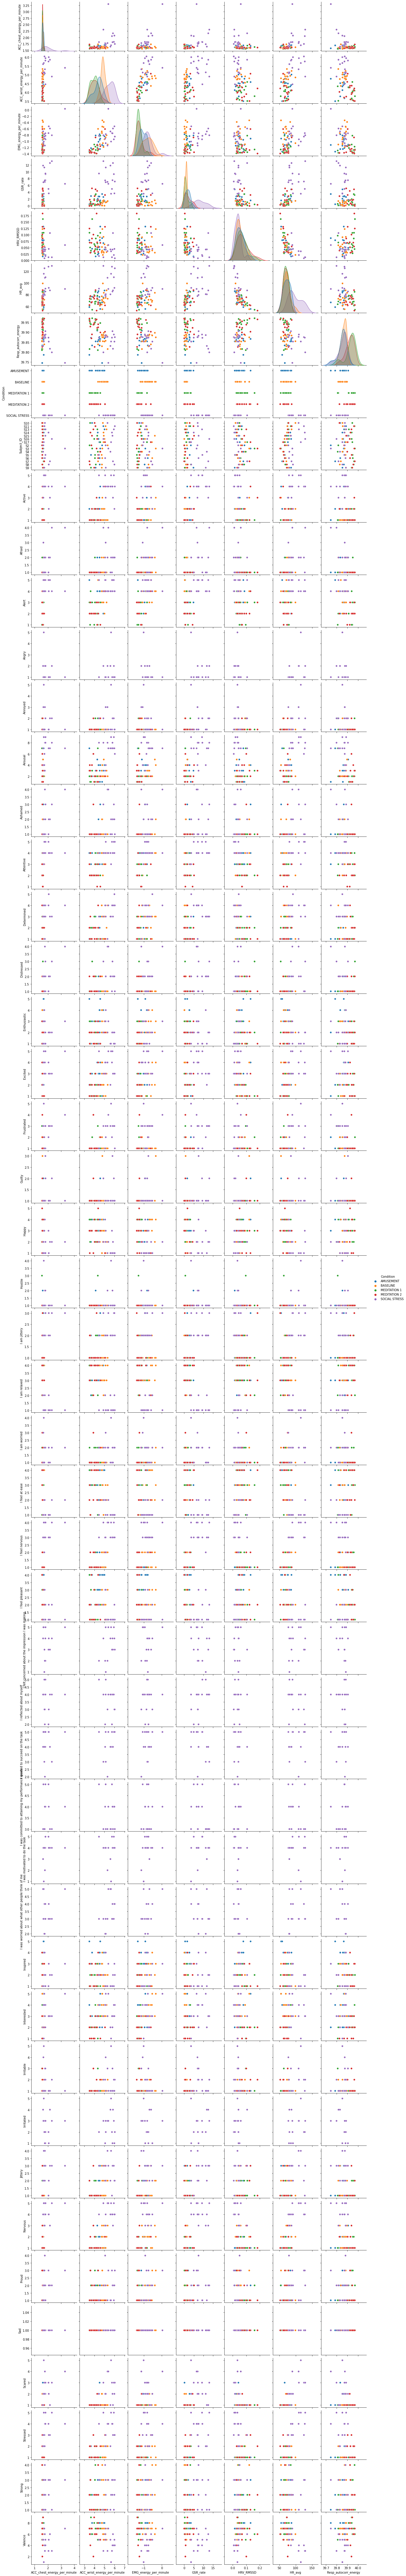

In [197]:
sns.pairplot(data=BOTH_unmelt_df, x_vars=x_col_names, y_vars=y_col_names, hue='Condition')

# The clearest associations are between heart rate and items like "Nervous".  This makes sense.  Not suprising.
# There may be some assocations with movement related variables or other physio measures and various items, but these are not as clear and may be illusory correlations brought on by Simpson's paradox. For example, lots of sweating and feeling stressed both occur during social stress, but the relative magnitude of the two may not correlate within any one condition.